# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 110.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=baa6c1a6eeab7d284d26baae66ee7f0971c9932d88bef53b0afb48d321914143
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

### Setup Kaggle API Key

In [1]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

The syntax of the command is incorrect.
'touch' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "amitranjan27"
kaggle_key = "c57238bcf9d641b01667bf97c79e6cba"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [2]:
!pip install kaggle

  Using cached kaggle-1.5.13.tar.gz (63 kB)
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77734 sha256=583ef94d4b1196347498a340efc93eb4548410fb13138772615a6e9e4c67b639
  Stored in directory: c:\users\amitr\appdata\local\pip\cache\wheels\9c\45\15\6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle


### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 47.4MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import autogluon.core as ag

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label='count',
                            problem_type='regression',
                             path='/content/drive/MyDrive',
                            eval_metric='root_mean_squared_error').fit(train_data = train.drop(['casual', 'registered'],axis=1),
                                                                       time_limit=600,
                                                                       presets='best_quality',
                                                                       ag_args_fit={'num_gpus': 1}
                                                          )

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/drive/MyDrive/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12464.02 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Gener

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.711828      10.524795  488.078481                0.000913           0.233405            3       True         14
1   RandomForestMSE_BAG_L2  -53.345036       9.741804  438.411020                0.588712          36.746856            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.736738       9.704154  414.342361                0.551062          12.678197            2       True         13
3          LightGBM_BAG_L2  -54.857239       9.384108  438.420023                0.231016          36.755860            2       True         11
4        LightGBMXT_BAG_L2  -60.609705      12.187556  475.079818                3.034464          73.415654            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.039281    0.031396         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.548

<Axes: xlabel='model'>

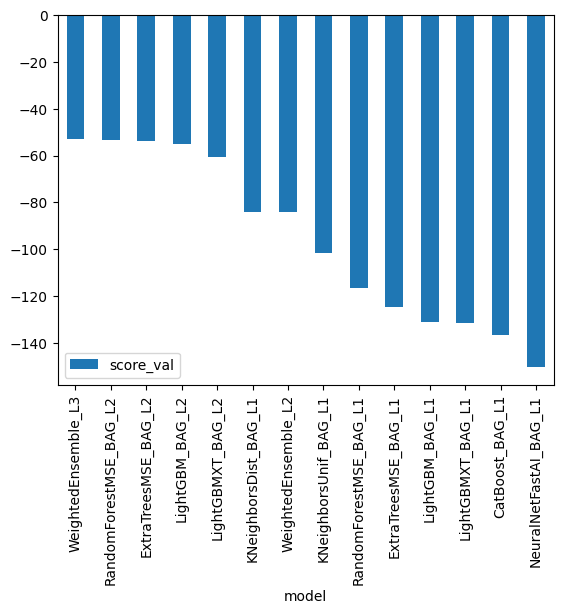

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
performance = predictor.evaluate(train)

/usr/local/lib/python3.10/dist-packages/autogluon/tabular/predictor/predictor.py:1420: FutureWarning: Calling `predictor.predict_proba` when problem_type=regression will raise an AssertionError starting in AutoGluon v0.8. Please call `predictor.predict` instead.
  warnings.warn(
Evaluation: root_mean_squared_error on test data: -71.44761713042256
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -71.44761713042256,
    "mean_squared_error": -5104.7619936154515,
    "mean_absolute_error": -48.78840069471421,
    "r2": 0.8444158643200542,
    "pearsonr": 0.9458780588572309,
    "median_absolute_error": -29.097787857055664
}


### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    23.611856
1    38.397758
2    42.997002
3    47.795578
4    51.163578
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.693581
std        90.041473
min         2.923446
25%        20.537388
50%        63.407089
75%       169.359085
max       365.016479
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
predictions[predictions<0].sum()

0.0

In [ ]:
# Set them to zero
predictions[predictions<0]=0

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 107kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                         status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------  --------  -----------  ------------  
submission.csv               2023-05-26 15:53:07  first raw submission                complete  1.80414      1.80414       
submission_new_features.csv  2023-05-26 15:25:32  new features                        complete  0.71055      0.71055       
submission.csv               2023-05-26 15:13:41  first raw submission                complete  1.79631      1.79631       
submission_new_hpo.csv       2023-05-26 14:22:40  new features with hyperparameters   complete  0.46463      0.46463       


#### Initial score of 1.80414

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

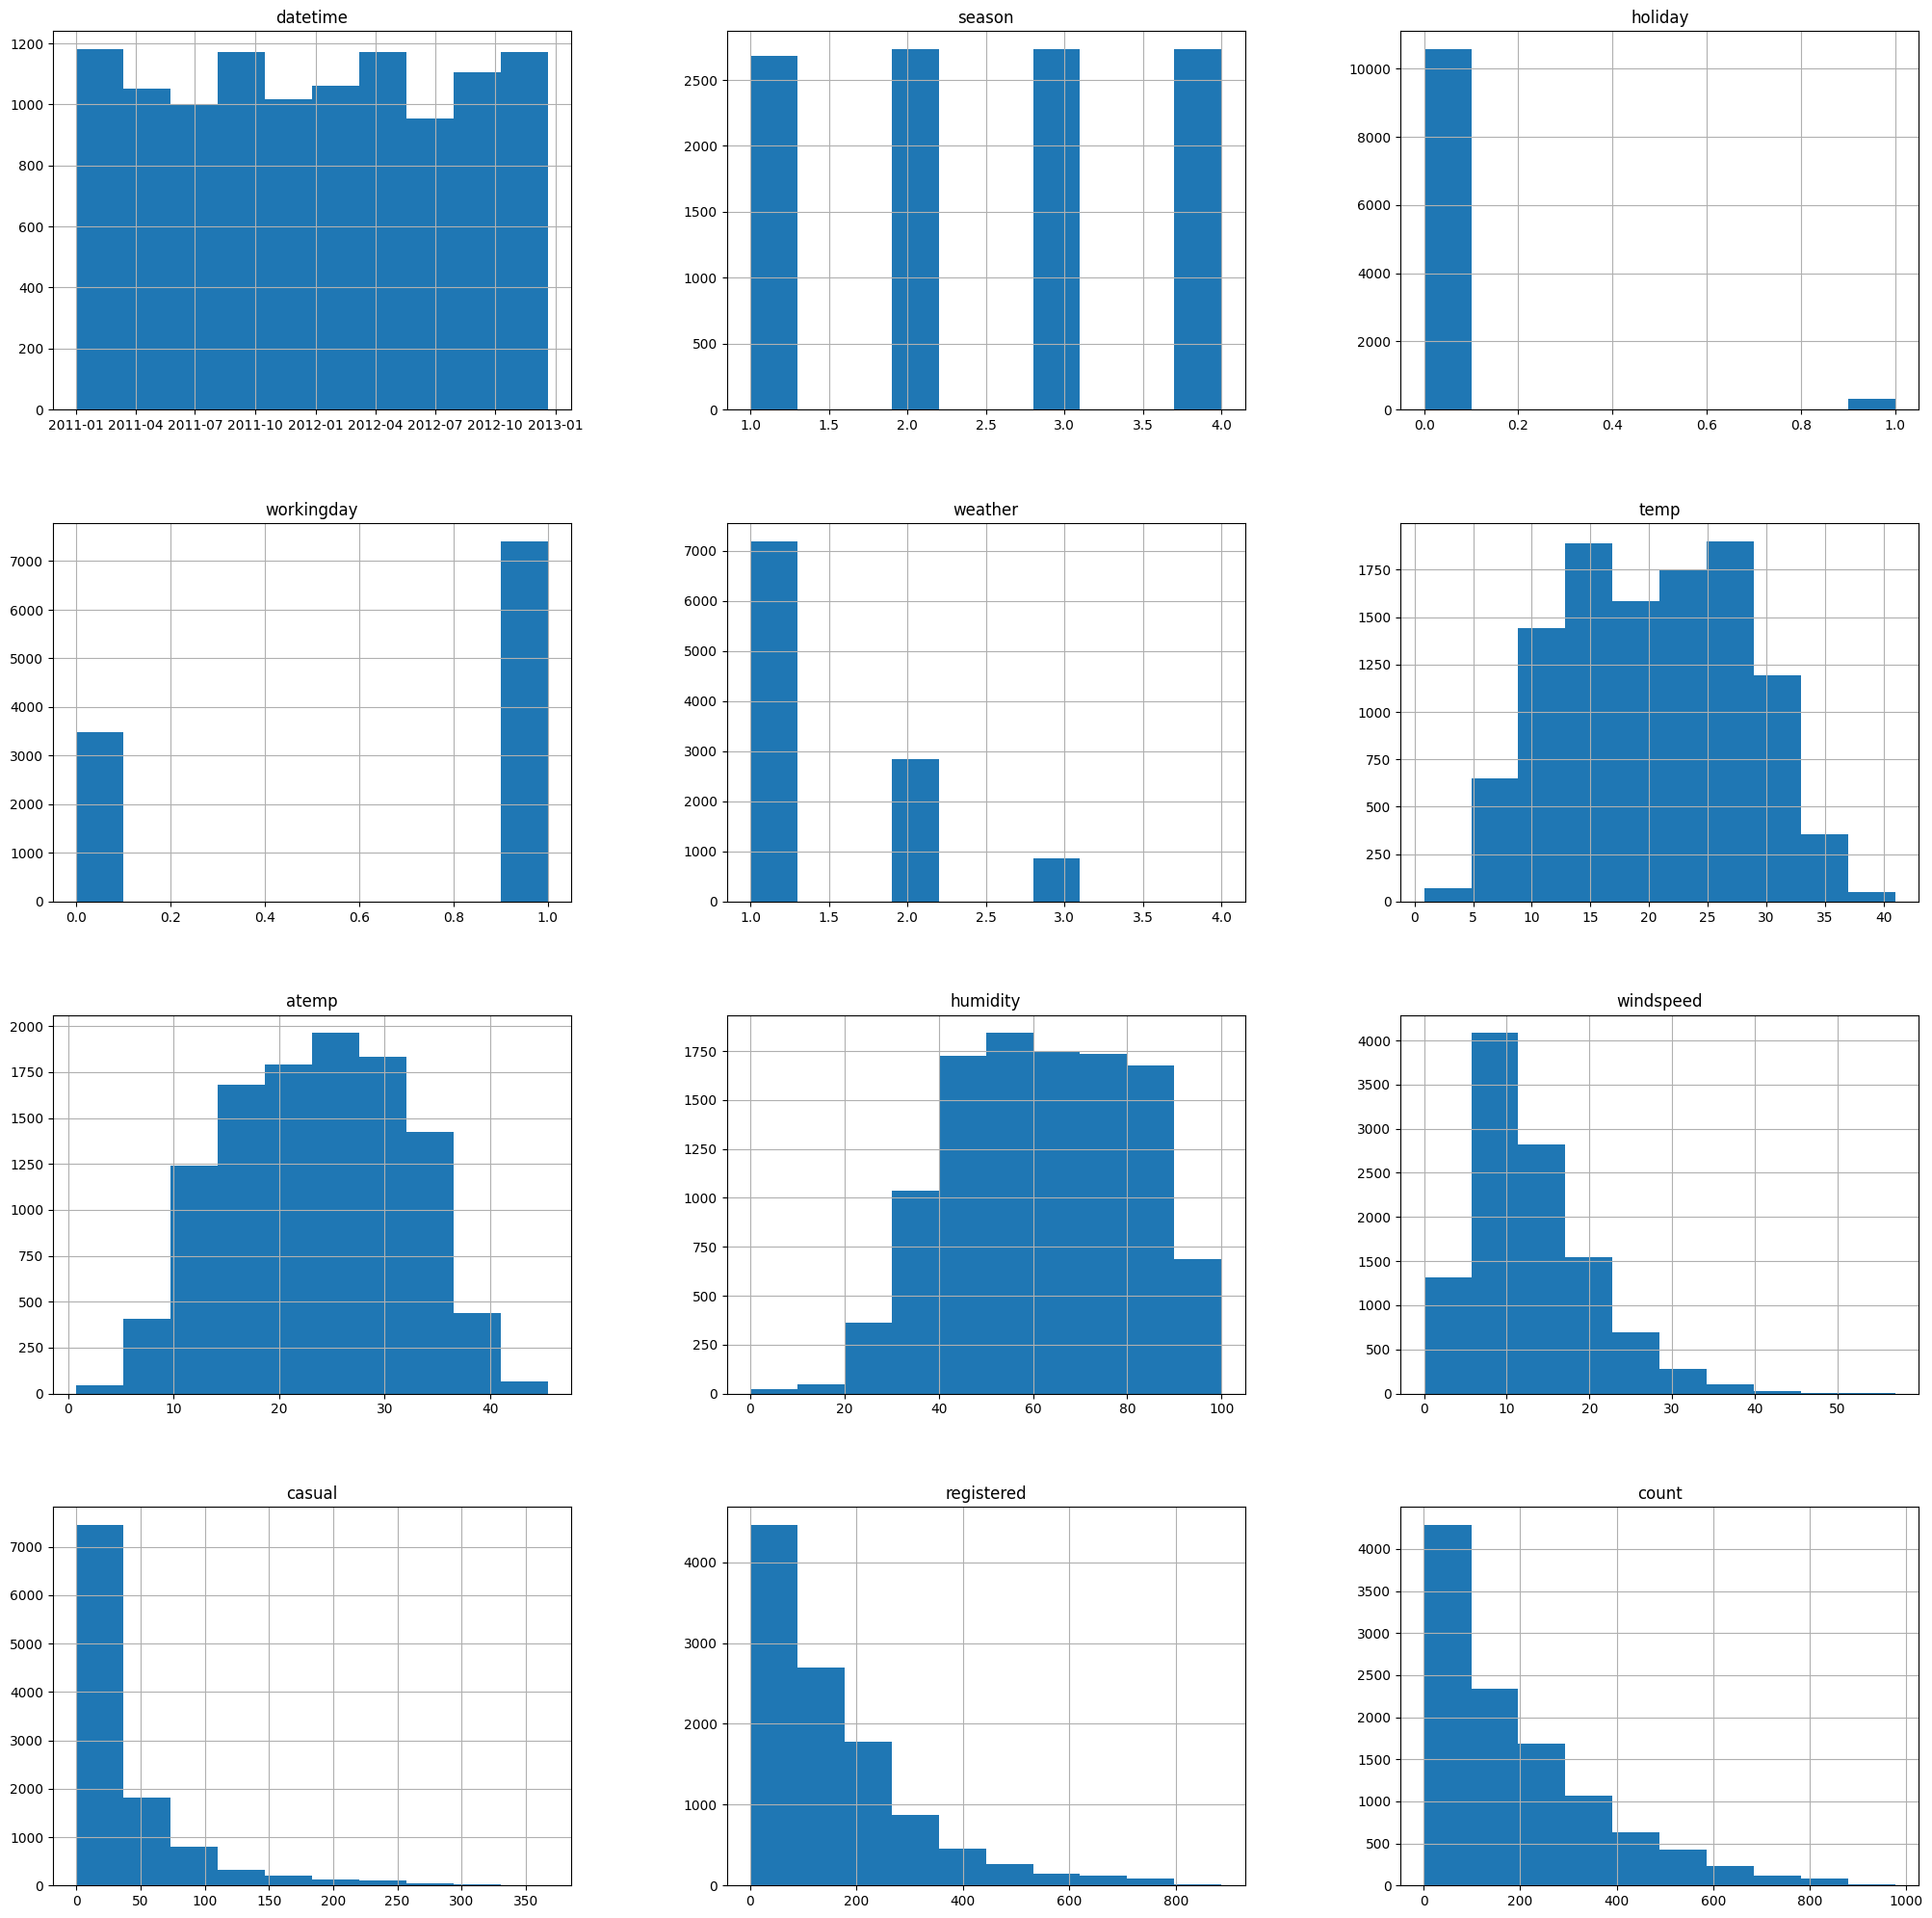

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(25,25))

In [ ]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour
train['hour_squared'] = train['hour'] ** 2
train['temp_humidity'] = train['temp'] * train['humidity']
test['hour_squared'] = test['hour'] ** 2
test['temp_humidity'] = test['temp'] * test['humidity']

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype(dtype='category')
train["weather"] = train["weather"].astype(dtype='category')
test["season"] = test["season"].astype(dtype='category')
test["weather"] = test["weather"].astype(dtype='category')

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,hour_squared,temp_humidity
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,0,797.04
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,721.60
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,4,721.60
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,9,738.00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,16,738.00


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'hour_squared'}>],
       [<Axes: title={'center': 'temp_humidity'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

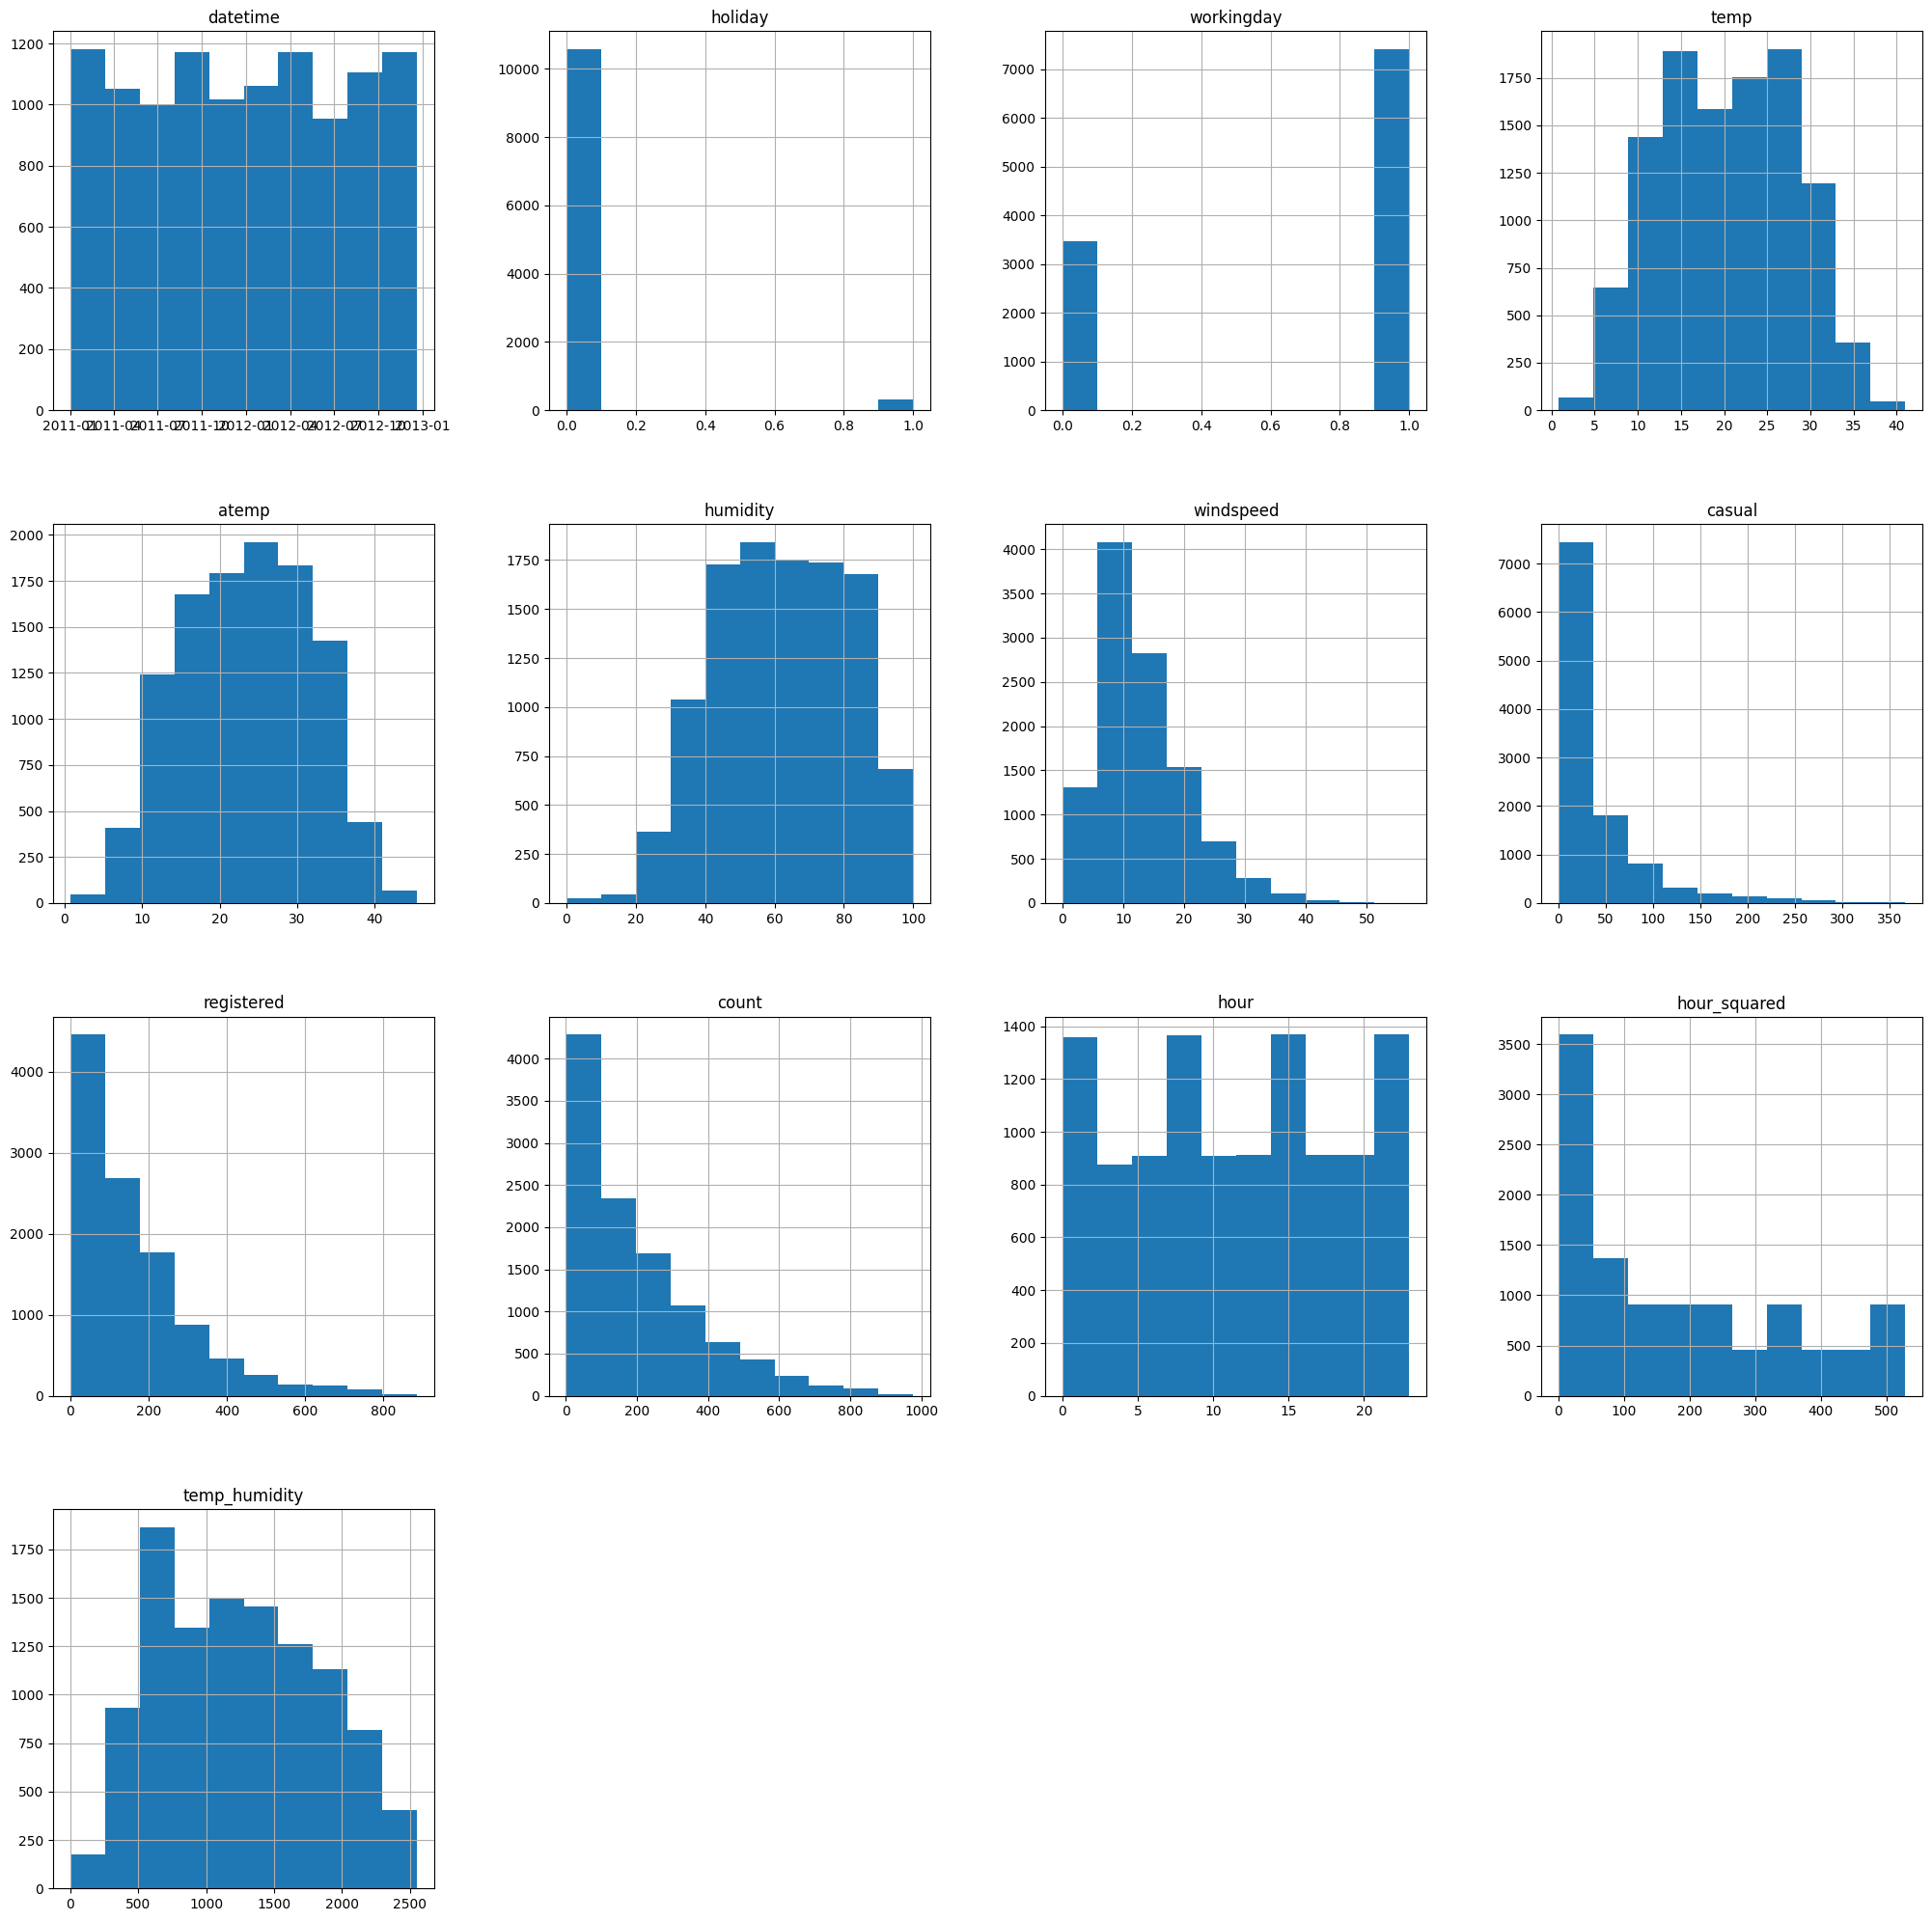

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(25,25))

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label='count',
                            problem_type='regression',
                            path='/content/drive/MyDrive',
                            eval_metric='root_mean_squared_error').fit(train_data = train.drop(['casual', 'registered'],axis=1),
                                                                       time_limit=600,
                                                                       presets='best_quality',
                                                                       ag_args_fit={'num_gpus': 1}
                                                                      )

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/drive/MyDrive/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11265.07 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Gene

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.357975      14.772519  579.032353                0.000739           0.266783            3       True         11
1        LightGBMXT_BAG_L2  -30.792525      13.762315  503.695594                1.278502          50.536785            2       True          8
2          LightGBM_BAG_L2  -30.804049      12.724764  492.855033                0.240951          39.696224            2       True          9
3   RandomForestMSE_BAG_L2  -31.936662      13.252328  488.532561                0.768514          35.373752            2       True         10
4      WeightedEnsemble_L2  -32.368611      12.341320  214.797323                0.000899           0.420642            2       True          7
5        LightGBMXT_BAG_L1  -34.165530       8.738765  125.547781         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.16553046530689,
  'LightGBM_BAG_L1': -34.250596295334894,
  'RandomForestMSE_BAG_L1': -38.53704066266535,
  'CatBoost_BAG_L1': -39.30646117897524,
  'WeightedEnsemble_L2': -32.368611096612945,
  'LightGBMXT_BAG_L2': -30.792524709870932,
  'LightGBM_BAG_L2': -30.80404

<Axes: xlabel='model'>

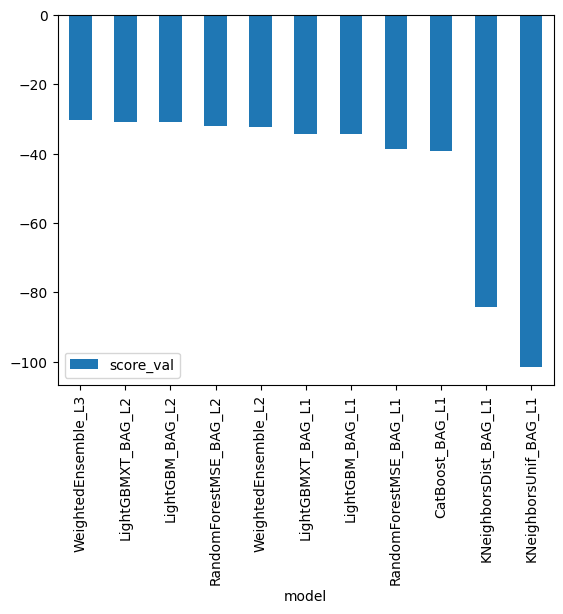

In [ ]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictions = predictor_new_features.predict(test)

In [ ]:
# Remember to set all negative values to zero
predictions[predictions<0].sum()
predictions[predictions<0]=0

In [ ]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:02<00:00, 71.4kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                         status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-26 16:04:20  new features                        complete  0.65044      0.65044       
submission.csv               2023-05-26 15:53:07  first raw submission                complete  1.80414      1.80414       
submission_new_features.csv  2023-05-26 15:25:32  new features                        complete  0.71055      0.71055       
submission.csv               2023-05-26 15:13:41  first raw submission                complete  1.79631      1.79631       


#### New Score of 0.65044

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
import autogluon.core as ag

In [ ]:
nn_options = {
    'num_epochs': 10,
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
    'layers': ag.space.Categorical([100], [500], [200, 100], [300, 200, 100]),
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),
    'batch_size': ag.space.Categorical(16, 32, 64)
}

gbm_options = {
    'num_boost_round': 100,
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),
    'learning_rate': ag.space.Real(0.01, 0.2, default=0.1, log=True),
    'min_data_in_leaf': ag.space.Int(lower=10, upper=100, default=20)
}

rf_options = {
    'n_estimators': ag.space.Int(lower=100, upper=1000, default=200),
    'max_depth': ag.space.Int(lower=5, upper=20, default=10),
    'min_samples_leaf': ag.space.Int(lower=1, upper=10, default=1),
    'max_features': ag.space.Categorical('sqrt', 'log2')
}

xgb_options = {
    'n_estimators': ag.space.Int(lower=100, upper=1000, default=200),
    'max_depth': ag.space.Int(lower=5, upper=20, default=10),
    'learning_rate': ag.space.Real(0.01, 0.2, default=0.1, log=True),
    'min_child_weight': ag.space.Real(1, 10, default=1),
    'subsample': ag.space.Real(0.5, 1, default=1),
    'colsample_bytree': ag.space.Real(0.5, 1, default=1)
}

hyperparameters = {
    'GBM': gbm_options,
    'NN': nn_options,
    'RF': rf_options,
    'XGB': xgb_options
}

search_strategy = 'auto'

hyperparameter_tune_kwargs = {
    'scheduler': 'local',
    'searcher': search_strategy,
    'num_trials': 50,
    'time_limits':1200
}



In [ ]:

predictor_new_hpo =TabularPredictor(label="count", eval_metric="root_mean_squared_error",path='/content/drive/MyDrive',
                                learner_kwargs={"ignored_columns": ["casual", "registered"]})

predictor_new_hpo.fit(train_data=train, hyperparameters=hyperparameters,
              hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,ag_args_fit={'num_gpus': 1})

Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11163.02 MB
	Train Data (Original)  Memory Usage:

  0%|          | 0/50 [00:00<?, ?it/s]

	Training LightGBM/T1 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T2 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T3 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T4 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T5 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T6 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T7 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T8 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T9 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/

  0%|          | 0/50 [00:00<?, ?it/s]

Fitted model: RandomForest/T1 ...
	-63.3475	 = Validation score   (-root_mean_squared_error)
	2.81s	 = Training   runtime
	0.44s	 = Validation runtime
Fitted model: RandomForest/T2 ...
	-54.9792	 = Validation score   (-root_mean_squared_error)
	4.15s	 = Training   runtime
	0.44s	 = Validation runtime
Fitted model: RandomForest/T3 ...
	-81.4429	 = Validation score   (-root_mean_squared_error)
	4.45s	 = Training   runtime
	0.61s	 = Validation runtime
Fitted model: RandomForest/T4 ...
	-55.1975	 = Validation score   (-root_mean_squared_error)
	7.18s	 = Training   runtime
	0.91s	 = Validation runtime
Fitted model: RandomForest/T5 ...
	-72.8553	 = Validation score   (-root_mean_squared_error)
	3.28s	 = Training   runtime
	0.52s	 = Validation runtime
Fitted model: RandomForest/T6 ...
	-50.0103	 = Validation score   (-root_mean_squared_error)
	9.42s	 = Training   runtime
	0.95s	 = Validation runtime
Fitted model: RandomForest/T7 ...
	-60.8037	 = Validation score   (-root_mean_squared_error)
	

  0%|          | 0/50 [00:00<?, ?it/s]

Fitted model: XGBoost/T1 ...
	-37.4681	 = Validation score   (-root_mean_squared_error)
	3.23s	 = Training   runtime
	0.08s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-36.9565	 = Validation score   (-root_mean_squared_error)
	2.02s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-35.9155	 = Validation score   (-root_mean_squared_error)
	5.79s	 = Training   runtime
	0.31s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-36.4122	 = Validation score   (-root_mean_squared_error)
	3.87s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: XGBoost/T5 ...
	-37.1364	 = Validation score   (-root_mean_squared_error)
	3.32s	 = Training   runtime
	0.25s	 = Validation runtime
Fitted model: XGBoost/T6 ...
	-38.0911	 = Validation score   (-root_mean_squared_error)
	0.93s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: XGBoost/T7 ...
	-35.3707	 = Validation score   (-root_mean_squared_error)
	10.72s	 = Training   runtime
	0.45s

  0%|          | 0/50 [00:00<?, ?it/s]

		Starting in v0.6.0, calling TabularNeuralNetMxnetModel will raise an exception.
		Consider instead using TabularNeuralNetTorchModel via "NN_TORCH".
'fill_value'=!missing! is invalid. Expected a numerical value when imputing numerical data
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/model_trial.py", line 43, in model_trial
    model = fit_and_save_model(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/model_trial.py", line 101, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2  -34.824982       1.056576  30.332862                0.000614           0.539521            2       True        151
1             XGBoost/T7  -35.370728       0.452888  10.724385                0.452888          10.724385            1       True        107
2            XGBoost/T48  -35.381646       0.176290   4.593190                0.176290           4.593190            1       True        148
3            XGBoost/T11  -35.451044       0.239347   6.370124                0.239347           6.370124            1       True        111
4            XGBoost/T33  -35.709377       0.224408   4.632751                0.224408           4.632751            1       True        133
5            XGBoost/T16  -35.839331       0.110362   6.325320                0.110362      

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T7': 'LGBModel',
  'LightGBM/T8': 'LGBModel',
  'LightGBM/T9': 'LGBModel',
  'LightGBM/T10': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'LightGBM/T14': 'LGBModel',
  'LightGBM/T15': 'LGBModel',
  'LightGBM/T16': 'LGBModel',
  'LightGBM/T17': 'LGBModel',
  'LightGBM/T18': 'LGBModel',
  'LightGBM/T19': 'LGBModel',
  'LightGBM/T20': 'LGBModel',
  'LightGBM/T21': 'LGBModel',
  'LightGBM/T22': 'LGBModel',
  'LightGBM/T23': 'LGBModel',
  'LightGBM/T24': 'LGBModel',
  'LightGBM/T25': 'LGBModel',
  'LightGBM/T26': 'LGBModel',
  'LightGBM/T27': 'LGBModel',
  'LightGBM/T28': 'LGBModel',
  'LightGBM/T29': 'LGBModel',
  'LightGBM/T30': 'LGBModel',
  'LightGBM/T31': 'LGBModel',
  'LightGBM/T32': 'LGBModel',
  'LightGBM/T33': 'LGBModel',
  'L

<Axes: xlabel='model'>

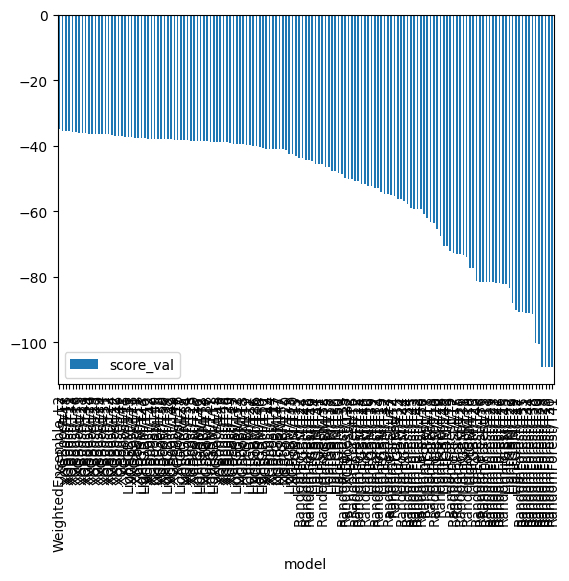

In [ ]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictions = predictor_new_hpo.predict(test)

In [ ]:
predictions[predictions<0].sum()

-13.688927

In [ ]:
predictions[predictions<0]=0

In [ ]:
# Same submitting predictions
submission_new_hpo =submission.copy()
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:02<00:00, 79.8kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                         status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-26 16:15:07  new features with hyperparameters   complete  0.46765      0.46765       
submission_new_features.csv  2023-05-26 16:04:20  new features                        complete  0.65044      0.65044       
submission.csv               2023-05-26 15:53:07  first raw submission                complete  1.80414      1.80414       
submission_new_features.csv  2023-05-26 15:25:32  new features                        complete  0.71055      0.71055       


#### New Score of 0.46765

## Step 6_1: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
# Define hyperparameters for different models 
hyperparameters = {
    'GBM': {'num_boost_round': ag.space.Int(lower=50, upper=500, default=100),
            'num_leaves': ag.space.Int(lower=10, upper=100, default=36)},
    'NN': {'num_epochs': ag.space.Int(lower=5, upper=20, default=10),
           'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
           'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
           'layers': ag.space.Categorical([50], [100], [200, 100], [300, 200, 100]),
           'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)},
    'RF': {'n_estimators': ag.space.Int(lower=100, upper=1000, default=200),
           'max_depth': ag.space.Int(lower=5, upper=20, default=10),
           'min_samples_leaf': ag.space.Int(lower=1, upper=10, default=1)},
    'XGB': {'n_estimators': ag.space.Int(lower=100, upper=1000, default=200),
            'max_depth': ag.space.Int(lower=5, upper=20, default=10),
            'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True)}
    
}

# Define hyperparameter tuning settings
hyperparameter_tune_kwargs = {
    'scheduler': 'local',
    'searcher': 'random',
    'num_trials': 50,
    'time_limits':600,
}



In [ ]:
# Fit the model with hyperparameter tuning
predictor_new_hpo1 = TabularPredictor(label="count", eval_metric="root_mean_squared_error",path='/content/drive/MyDrive',
                                learner_kwargs={"ignored_columns": ["casual", "registered"]})

predictor_new_hpo1.fit(train_data=train, hyperparameters=hyperparameters,
              hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,ag_args_fit={'num_gpus': 1})

Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/MyDrive/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    9766.88 MB
	Train Data (Original)  Memory Usage: 

  0%|          | 0/50 [00:00<?, ?it/s]

	Training LightGBM/T1 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T2 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T3 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T4 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T5 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T6 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T7 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T8 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/T9 with GPU, note that this may negatively impact model quality compared to CPU training.
	Training LightGBM/

  0%|          | 0/50 [00:00<?, ?it/s]

Fitted model: RandomForest/T1 ...
	-46.1356	 = Validation score   (-root_mean_squared_error)
	5.27s	 = Training   runtime
	0.32s	 = Validation runtime
Fitted model: RandomForest/T2 ...
	-42.5083	 = Validation score   (-root_mean_squared_error)
	12.64s	 = Training   runtime
	0.31s	 = Validation runtime
Fitted model: RandomForest/T3 ...
	-59.1781	 = Validation score   (-root_mean_squared_error)
	7.5s	 = Training   runtime
	0.45s	 = Validation runtime
Fitted model: RandomForest/T4 ...
	-41.4804	 = Validation score   (-root_mean_squared_error)
	15.64s	 = Training   runtime
	0.6s	 = Validation runtime
Fitted model: RandomForest/T5 ...
	-71.458	 = Validation score   (-root_mean_squared_error)
	10.3s	 = Training   runtime
	0.93s	 = Validation runtime
Fitted model: RandomForest/T6 ...
	-45.4842	 = Validation score   (-root_mean_squared_error)
	20.09s	 = Training   runtime
	0.69s	 = Validation runtime
Fitted model: RandomForest/T7 ...
	-40.1194	 = Validation score   (-root_mean_squared_error)
	

  0%|          | 0/50 [00:00<?, ?it/s]

Fitted model: XGBoost/T1 ...
	-242.2085	 = Validation score   (-root_mean_squared_error)
	1.97s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: XGBoost/T2 ...
	-57.6242	 = Validation score   (-root_mean_squared_error)
	4.51s	 = Training   runtime
	0.46s	 = Validation runtime
Fitted model: XGBoost/T3 ...
	-99.0782	 = Validation score   (-root_mean_squared_error)
	3.23s	 = Training   runtime
	0.34s	 = Validation runtime
Fitted model: XGBoost/T4 ...
	-39.3426	 = Validation score   (-root_mean_squared_error)
	20.52s	 = Training   runtime
	0.43s	 = Validation runtime
Fitted model: XGBoost/T5 ...
	-139.0641	 = Validation score   (-root_mean_squared_error)
	2.48s	 = Training   runtime
	0.16s	 = Validation runtime
Fitted model: XGBoost/T6 ...
	-102.8627	 = Validation score   (-root_mean_squared_error)
	2.15s	 = Training   runtime
	0.16s	 = Validation runtime
Fitted model: XGBoost/T7 ...
	-82.8919	 = Validation score   (-root_mean_squared_error)
	1.46s	 = Training   runtime
	0.

  0%|          | 0/50 [00:00<?, ?it/s]

'fill_value'=!missing! is invalid. Expected a numerical value when imputing numerical data
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/model_trial.py", line 43, in model_trial
    model = fit_and_save_model(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/model_trial.py", line 101, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 703, in fit
    out = self._fit(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 156, in _fit
    train_dataset, val_dataset = self.generate_datasets(X=X, y=y, params=params, X_val=X_val, y_val=y_val)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/models/tabular_nn/mxnet/tabular_nn_mxnet.py", line 446, in generate_datasets
    train_dataset = 

In [ ]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2  -34.898059       5.002062  111.771389                0.000491           0.481708            2       True        151
1           LightGBM/T47  -35.924928       0.042139    1.587203                0.042139           1.587203            1       True         47
2            LightGBM/T2  -35.931911       0.077495    2.277196                0.077495           2.277196            1       True          2
3            LightGBM/T7  -36.169756       0.039169    0.964131                0.039169           0.964131            1       True          7
4            LightGBM/T8  -36.190762       0.139982    1.775807                0.139982           1.775807            1       True          8
5           LightGBM/T12  -36.345767       0.089327    1.088938                0.08932

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T7': 'LGBModel',
  'LightGBM/T8': 'LGBModel',
  'LightGBM/T9': 'LGBModel',
  'LightGBM/T10': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'LightGBM/T14': 'LGBModel',
  'LightGBM/T15': 'LGBModel',
  'LightGBM/T16': 'LGBModel',
  'LightGBM/T17': 'LGBModel',
  'LightGBM/T18': 'LGBModel',
  'LightGBM/T19': 'LGBModel',
  'LightGBM/T20': 'LGBModel',
  'LightGBM/T21': 'LGBModel',
  'LightGBM/T22': 'LGBModel',
  'LightGBM/T23': 'LGBModel',
  'LightGBM/T24': 'LGBModel',
  'LightGBM/T25': 'LGBModel',
  'LightGBM/T26': 'LGBModel',
  'LightGBM/T27': 'LGBModel',
  'LightGBM/T28': 'LGBModel',
  'LightGBM/T29': 'LGBModel',
  'LightGBM/T30': 'LGBModel',
  'LightGBM/T31': 'LGBModel',
  'LightGBM/T32': 'LGBModel',
  'LightGBM/T33': 'LGBModel',
  'L

<Axes: xlabel='model'>

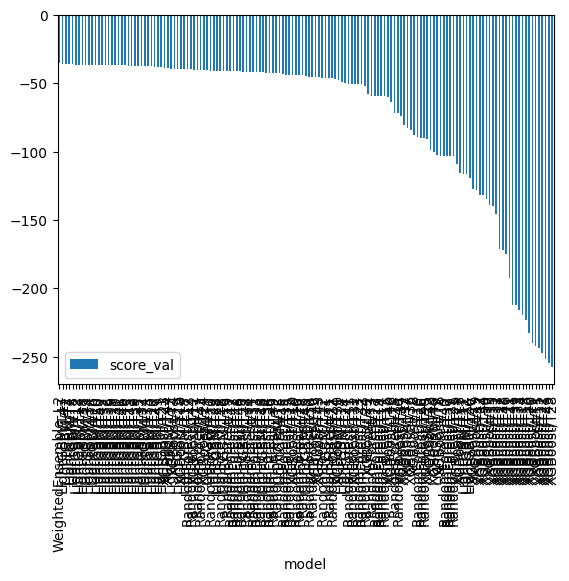

In [ ]:
predictor_new_hpo1.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictions = predictor_new_hpo1.predict(test)

In [ ]:
# Remember to set all negative values to zero
predictions[predictions<0].sum()

-46.586395

In [ ]:
predictions[predictions<0]=0

In [ ]:
# Same submitting predictions
submission_new_hpo1 =submission.copy()
submission_new_hpo1["count"] = predictions
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters1"

100% 188k/188k [00:02<00:00, 86.1kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                         status    publicScore  privateScore  
---------------------------  -------------------  ----------------------------------  --------  -----------  ------------  
submission_new_hpo1.csv      2023-05-26 16:46:12  new features with hyperparameters1  complete  0.49301      0.49301       
submission_new_hpo.csv       2023-05-26 16:15:07  new features with hyperparameters   complete  0.46765      0.46765       
submission_new_features.csv  2023-05-26 16:04:20  new features                        complete  0.65044      0.65044       
submission.csv               2023-05-26 15:53:07  first raw submission                complete  1.80414      1.80414       


#### New Score of 0.49301

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

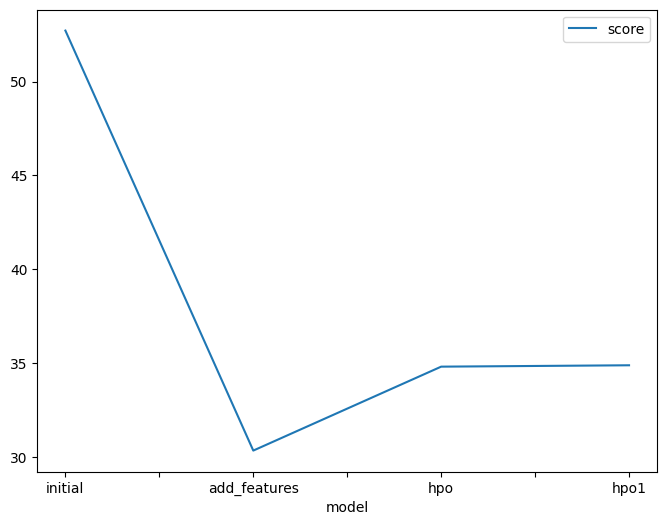

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo","hpo1"],
        "score": [52.711828, 30.357975, 34.824982,34.898059]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

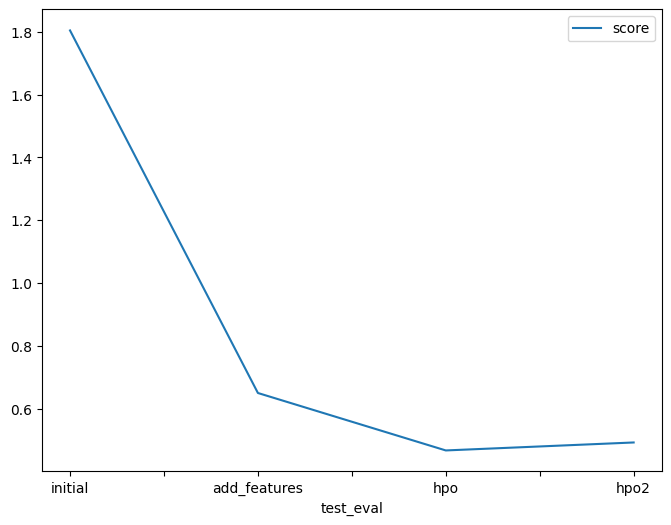

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo","hpo2"],
        "score": [1.80414, 0.65044, 0.46765,0.49301]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
hp_df = pd.DataFrame({
    "model": ["initial_model", "add_features_model", "hpo_model","hpo1_model"],
    "hpo1": ['default_values', 'default_values', 'GBM: gbm_options','GBM'],
    "hpo2": ['default_values', 'default_values', 'rf: rf_options','RF'],
    "hpo3": ['default_values', 'default_values', 'XGB: xgb_options','NN'],
    "hpo3": ['default_values', 'default_values', 'NN: nn_options','XGB'],
    "score": [1.80414, 0.65044, 0.46765,0.49301]
})

In [ ]:
hp_df.head()

,model,hpo1,hpo2,hpo3,score
0,initial_model,default_values,default_values,default_values,1.80414
1,add_features_model,default_values,default_values,default_values,0.65044
2,hpo_model,GBM: gbm_options,rf: rf_options,NN: nn_options,0.46765
3,hpo1_model,GBM,RF,XGB,0.49301
